<a href="https://colab.research.google.com/github/faizanhemotra/CE888/blob/main/Lab%204/my_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.set_printoptions(precision=3)

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/jester-data-1.csv', prefix=0, header=None)
df = df.replace(99, np.NaN)

In [3]:
df.drop([0], axis=1, inplace=True)
df.columns = [i for i in range(1, 101)]

In [4]:
df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.42,NaN,NaN,NaN,-7.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,7.91,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.00,2.77,8.30,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,NaN,8.25,NaN,NaN,7.48,7.28,7.28,8.93,NaN,6.17,7.28,NaN,NaN,8.98,7.33,NaN,6.17,9.08,7.33,...,6.46,7.28,NaN,NaN,7.04,7.28,NaN,7.28,8.25,NaN,NaN,NaN,NaN,NaN,NaN,8.93,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.03,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,NaN,NaN,NaN,NaN,2.91,3.93,6.75,6.60,NaN,6.65,-6.12,NaN,7.57,6.21,6.65,NaN,-8.30,7.18,2.82,...,0.00,-3.69,NaN,NaN,7.82,0.24,NaN,7.28,-2.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.63,NaN,NaN,-2.33,NaN,NaN,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,2.48,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,NaN,NaN,NaN,NaN,NaN,NaN,4.13,NaN,NaN,NaN,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,7.23,-0.53,5.63,-7.14,-4.08,-3.50,-8.20,-3.98,-9.22,-0.15,-6.46,5.63,-0.92,-2.91,-4.17,2.82,3.40,8.64,6.84,6.80,-0.87,7.38,-3.50,8.88,7.43,5.39,2.23,-0.68,3.40,-0.58,4.42,...,8.59,3.45,0.87,9.27,-4.66,5.73,-0.49,8.35,1.94,5.00,-9.66,8.98,8.98,-9.81,9.13,9.08,9.08,3.98,0.73,9.03,8.98,9.22,8.93,9.13,9.27,-1.99,-9.95,-9.90,9.13,8.83,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24979,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,4.90,8.88,-8.69,-7.48,-8.83,-1.75,6.60,3.54,1.50,7.67,-0.44,9.22,8.74,9.03,9.08,8.93,3.74,3.20,-9.17,-8.98,8.79,-7.67,-3.06,9.13,8.40,-0.63,-7.18,0.58,8.88,9.27,8.50,...,2.77,8.11,-7.96,8.93,-0.87,-5.87,8.88,-1.12,-8.74,8.74,NaN,NaN,NaN,NaN,NaN,4.90,NaN,NaN,NaN,NaN,-0.29,0.92,-0.78,0.15,-0.10,0.00,-0.19,-0.87,-1.36,-0.58,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24980,NaN,NaN,NaN,NaN,-7.77,NaN,6.70,-6.75,NaN,NaN,NaN,NaN,-6.46,-1.65,-6.80,-6.41,-6.99,7.23,6.75,-6.99,6.55,NaN,NaN,NaN,NaN,0.49,-0.53,-6.94,-0.49,NaN,6.46,-0.53,NaN,NaN,-7.86,-0.34,NaN,-6.94,NaN,NaN,...,0.49,-0.24,NaN,NaN,-3.11,-6.65,NaN,-0.58,6.31,NaN,NaN,-7.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24981,NaN,NaN,NaN,NaN,-9.71,NaN,4.56,-8.30,NaN,NaN,NaN,NaN,-9.47,NaN,3.45,-0.92,-4.51,-4.13,-5.73,-9.51,2.82,NaN,NaN,NaN,NaN,-0.49,2.91,2.62,8.30,NaN,3.06,5.44,NaN,NaN,-0.68,2.04,NaN,NaN,1.

## Jokes Ratings Distribution

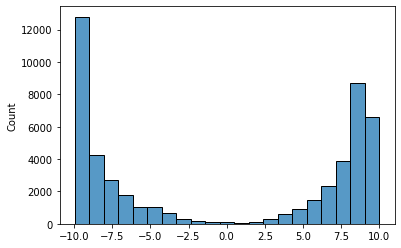

In [5]:
sns.histplot(data=df.min(axis=1).append(df.max(axis=1)))

## Validation Set

In [6]:
arr = df.to_numpy()

In [7]:
rated = np.where(arr != np.NaN)
print(len(rated[0]), rated[1].shape)

2498300 (2498300,)


In [8]:
def replace(orig, percentage=0.1):
        """
        Replaces 'percentage'% of the original values in 'orig' with 99's
        :param orig: original data array
        :param percentage: percentage of values to replace (0<percentage<1)
        """
        new_data = orig.copy()
        rated = np.where(arr != np.NaN)
        n_rated = len(rated[0])
        idx = np.random.choice(n_rated, size=int(percentage*n_rated), replace=False)
        new_data[rated[0][idx], rated[1][idx]] = np.NaN
        return new_data, (rated[0][idx], rated[1][idx])

In [9]:
val_arr, idx = replace(arr, 0.1)

In [10]:
arr[idx[0][0], idx[1][0]]

-4.47

In [11]:
val_arr[idx[0][0], idx[1][0]]

nan

In [12]:
val_arr.shape

(24983, 100)

## Latent Factor Modelling

In [13]:
n_latent_factors = 2

# Initialise as random values
latent_user_preferences = np.random.random((val_arr.shape[0], n_latent_factors))
latent_item_features = np.random.random((val_arr.shape[1], n_latent_factors))

In [14]:
latent_item_features

array([[0.742, 0.83 ],
       [0.373, 0.215],
       [0.438, 0.273],
       [0.702, 0.258],
       [0.08 , 0.959],
       [0.104, 0.071],
       [0.212, 0.192],
       [0.469, 0.816],
       [0.161, 0.249],
       [0.376, 0.078],
       [0.259, 0.559],
       [0.835, 0.291],
       [0.605, 0.347],
       [0.496, 0.325],
       [0.621, 0.228],
       [0.08 , 0.085],
       [0.812, 0.586],
       [0.57 , 0.586],
       [0.705, 0.988],
       [0.82 , 0.467],
       [0.814, 0.293],
       [0.47 , 0.595],
       [0.476, 0.415],
       [0.262, 0.728],
       [0.784, 0.125],
       [0.923, 0.983],
       [0.446, 0.516],
       [0.986, 0.052],
       [0.197, 0.457],
       [0.206, 0.913],
       [0.202, 0.293],
       [0.909, 0.982],
       [0.395, 0.656],
       [0.266, 0.439],
       [0.288, 0.464],
       [0.268, 0.149],
       [0.912, 0.966],
       [0.981, 0.914],
       [0.17 , 0.829],
       [0.845, 0.255],
       [0.527, 0.456],
       [0.41 , 0.521],
       [0.297, 0.798],
       [0.1

In [15]:
latent_user_preferences

array([[0.544, 0.872],
       [0.075, 0.272],
       [0.049, 0.516],
       ...,
       [0.719, 0.017],
       [0.01 , 0.225],
       [0.751, 0.961]])

In [16]:
def predict_rating(user_id, item_id):
        """ Predict a rating given a user_id and an item_id.
        """
        user_preference = latent_user_preferences[user_id]
        item_preference = latent_item_features[item_id]
        return user_preference.dot(item_preference)


def train(user_id, item_id, rating, alpha=0.0001):
        #print(item_id)
        predicted_rating = predict_rating(user_id, item_id)
        err = predicted_rating - rating
        #print(err)
        user_pref_values = latent_user_preferences[user_id]
        latent_user_preferences[user_id] -= alpha * err * latent_item_features[item_id]
        latent_item_features[item_id] -= alpha * err * user_pref_values
        return err


def sgd(iterations):
        """ Iterate over all users and all items and train for 
            a certain number of iterations
        """
        mse_history = []
        for iteration in range(iterations):
            error = []
            for user_id in range(latent_user_preferences.shape[0]):
                for item_id in range(latent_item_features.shape[0]):
                    rating = val_arr[user_id, item_id]
                    if not np.isnan(rating):
                        err = train(user_id, item_id, rating)
                        error.append(err)
            mse = (np.array(error) ** 2).mean()   
            if (iteration % 2) == 0:
                print('Iteration %d/%d:\tMSE=%.6f' % (iteration, iterations, mse))
                mse_history.append(mse)
        return mse_history

Iteration 0/10:	MSE=26.215843
Iteration 2/10:	MSE=24.990783
Iteration 4/10:	MSE=24.564901
Iteration 6/10:	MSE=24.139829
Iteration 8/10:	MSE=23.708868


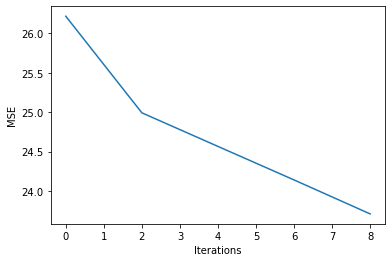

In [17]:
num_iter = 10
hist = sgd(num_iter)  # Note how the MSE decreases with the number of iterations
plt.figure()
plt.plot(np.arange(0, num_iter, 2), hist)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()

## Predictions

In [18]:
predictions = latent_user_preferences.dot(latent_item_features.T)
predictions

array([[1.548, 0.964, 0.913, ..., 1.783, 0.565, 2.388],
       [0.483, 0.298, 0.284, ..., 0.565, 0.151, 0.745],
       [1.467, 0.908, 0.863, ..., 1.707, 0.487, 2.263],
       ...,
       [0.657, 0.437, 0.398, ..., 0.679, 0.462, 1.017],
       [0.398, 0.243, 0.233, ..., 0.47 , 0.111, 0.613],
       [2.095, 1.312, 1.238, ..., 2.394, 0.821, 3.234]])

In [19]:
values = [zip(val_arr[i], predictions[i]) for i in range(predictions.shape[0])]
comparison_data = pd.DataFrame(values)
comparison_data.columns = df.columns

In [20]:
comparison_data

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,"(-7.82, 1.5478317480585957)","(8.79, 0.9638940190487799)","(-9.66, 0.912537246345835)","(-8.16, -1.0449370336264288)","(-7.52, 1.1180577967983996)","(-8.5, 2.6449295364708774)","(-9.85, -0.0692721157893489)","(4.17, -0.4483679555548778)","(-8.98, -0.1522451700597308)","(nan, 1.9194029278290166)","(-8.5, 2.76071697113374)","(-6.75, 2.5638851535906397)","(-7.18, -1.7729157268626645)","(8.45, 2.5481316153420615)","(-7.18, -1.8919610248258092)","(-7.52, -3.4215828895724623)","(-7.43, -0.8575657275724179)","(-9.81, -0.42890686391822835)","(-9.85, 0.7357975738457949)","(-9.85, -0.5373991005462068)","(nan, 3.309174287637812)","(1.5, 1.7623590834628104)","(-4.37, 0.741028903489968)","(-9.81, -1.4228379197336616)","(-8.5, 1.2209871794921618)","(1.12, 2.39458792687483)","(7.82, 4.394458755913902)","(2.86, 2.4979948822156186)","(9.13, 4.1580481218636915)","(-7.43, 0.2876753564877503)","(nan, 3.356170379918345)","(-4.08, 4.378827284790729)","(nan, -0.8415476747018051)","(7.82, 1.9262357117194355)","(5.05, 4.207042870857126)","(4.95, 4.438710051856612)","(-9.17, -1.0590756016975431)","(-8.4, 2.1071797022784193)","(nan, 2.16947853807826)","(-8.4, 1.934139469064798)",...,"(nan, 3.6723099062975186)","(3.59, 4.168613669827285)","(-6.84, 1.108103386600388)","(-9.03, -0.1685293179457048)","(2.82, 3.5253452170554946)","(nan, 3.749877066592659)","(-9.08, -0.42182192780058003)","(8.3, 3.8315030214003776)","(5.68, 3.81758528810855)","(-4.81, 1.3824962957969793)","(nan, -0.0950267029086438)","(nan, 3.9046456688823503)","(nan, 2.0190209145895666)","(nan, -1.012914854928472)","(nan, 0.34167698993629825)","(nan, 3.477551621922526)","(nan, 1.5374705224186866)","(-9.42, 2.731144142434934)","(nan, 0.9381535174509724)","(nan, 2.181678259491063)","(nan, 2.888351682319297)","(-7.72, 1.7654725938447997)","(nan, 3.0336555271348993)","(nan, 1.5405029065940816)","(nan, 1.833345147465815)","(nan, 0.8481446670542111)","(nan, 2.782929557765796)","(nan, 3.0219505907748623)","(nan, 4.675336254322967)","(nan, 1.4363553340173518)","(2.82, 2.864836319743326)","(nan, 2.0423958265060973)","(nan, 3.5452363500335125)","(nan, 1.9727130773943822)","(nan, 1.725932472526984)","(nan, 2.4057276687455773)","(-5.63, 2.4786461177275743)","(nan, 1.7833224261116172)","(nan, 0.5645766534134126)","(nan, 2.388224797982641)"
1,"(4.08, 0.48287317513645306)","(-0.29, 0.2976285905265301)","(nan, 0.2835314575972231)","(nan, -0.32421397175725114)","(nan, 0.37856900563881907)","(-9.66, 0.8413691240449775)","(-0.73, -0.02593787906539646)","(-5.34, -0.1322102971013012)","(8.88, -0.045263408389209774)","(9.22, 0.5985357904786395)","(6.75, 0.858715207965892)","(8.64, 0.7970710360515024)","(4.42, -0.5599834822479185)","(7.43, 0.7950052206396824)","(4.56, -0.6040091201110571)","(-0.97, -1.0623184907491905)","(4.66, -0.2704922750416048)","(-0.68, -0.13161464336874631)","(3.3, 0.23723220468387096)","(-1.21, -0.16051600159464044)","(nan, 1.0335009354484836)","(nan, 0.559466665145495)","(8.35, 0.2276634815901704)","(9.17, -0.4359184154979087)","(nan, 0.3764004285054771)","(7.57, 0.7521284114551263)","(4.71, 1.3713524735121454)","(0.87, 0.7727934582553989)","(-0.39, 1.304537063371584)","(6.99, 0.10936404971193565)","(6.5, 1.048449131290027)","(-0.92, 1.3667601213221432)","(7.14, -0.2610799275181985)","(9.03, 0.6142227533261023)","(nan, 1.3065873262800243)","(0.73, 1.3840532913295402)","(7.09, -0.3314964762477686)","(3.4, 0.6564324413465524)","(-0.87, 0.687821071910575)","(7.91, 0.5966635612562722)",...,"(-6.7, 1.1431300957438728)","(-3.35, 1.2989618257438391)","(-9.03, 0.352744397757764)","(4.47, -0.0450081733507449)","(4.08, 1.1052646902189716)","(-3.83, 1.1814388668003963)","(8.74, -0.13913089936994383)","(1.12, 1.210469195317444)","(0.78, 1.1990255224335482)","(7.52, 

## Quiz

In [21]:
df.mean().idxmin()

58

In [22]:
df.loc[3781, 97]

8.98

In [23]:
df_excel_items = pd.read_excel('https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/movies_latent_factors.xlsx')
df_excel_users = pd.read_excel('https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/movies_latent_factors.xlsx', sheet_name='Users')

In [24]:
df_excel_items.head(2)

,Movie ID,Title,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
0,11,Star Wars: Episode IV - A New Hope (1977),-1.521848,-1.038507,2.027269,0.247933,-0.594548,2.513260,-1.848910,0.476710,-0.224146,-0.760681,-0.973915,0.862379,0.403861,1.129616,-0.248806
1,12,Finding Nemo (2003),-0.342185,-0.296586,-0.385962,2.443297,-1.097015,-0.619465,0.572887,0.329516,-0.712228,0.323554,-0.561948,-0.142405,-0.564415,0.506876,1.274993


In [25]:
df_excel_users.head()

,User,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
0,4768,-0.204024,0.161079,-0.090447,0.138495,-0.162934,0.163894,0.051502,-0.088582,0.126829,0.065967,0.085008,0.355404,0.007108,-0.118663,-0.039125
1,156,-0.189652,-0.178979,-0.091490,-0.000823,-0.032646,0.177209,-0.098123,-0.068283,-0.011575,0.120866,-0.009931,-0.048606,0.045916,0.113671,0.179873
2,5323,-0.115308,-0.090886,-0.053129,0.018472,-0.068081,-0.004828,0.113005,0.102107,0.034758,0.000693,-0.073712,-0.019460,0.108372,0.054471,-0.109552
3,174,-0.227462,-0.272532,-0.017231,0.054324,0.214755,-0.072639,-0.033122,-0.086508,-0.131479,0.180403,0.095890,-0.082396,0.036767,-0.165438,0.050692
4,4529,-0.014616,-0.102218,-0.107935,0.155784,-0.123362,-0.118228,-0.013549,-0.050622,0.058698,-0.159600,-0.142382,-0.132836,-0.039897,0.129063,0.102669


In [26]:
index = df_excel_items['Movie ID'][df_excel_items['Movie ID'] == 1900].index
df_excel_items.loc[index, ['Movie ID', 'Factor12']]

,Movie ID,Factor12
80,1900,0.163373


In [27]:
df_excel_items['Factor11'].idxmin()

43

In [28]:
df_excel_items.loc[43]

Movie ID                    558
Title       Spider-Man 2 (2004)
Factor1                 2.23522
Factor2               -0.788129
Factor3                0.596722
Factor4               -0.400082
Factor5                -1.24662
Factor6                 -1.5072
Factor7               -0.219911
Factor8               -0.486254
Factor9                0.331657
Factor10               -1.83376
Factor11               -2.24334
Factor12               -1.19794
Factor13               -1.45081
Factor14               -2.38112
Factor15              -0.455753
Name: 43, dtype: object

In [29]:
print(df_excel_users.shape, (df_excel_items.drop(['Title'], axis=1)).T.shape)

(25, 16) (16, 100)


In [30]:
latent_user_preferences = df_excel_users.drop(['User'], axis=1).to_numpy() #dropping id
latent_item_features = df_excel_items.drop(['Movie ID', 'Title'], axis=1).T.to_numpy() #dropping id and transposing it for multiplication

In [31]:
a = latent_user_preferences.dot(latent_item_features)

In [32]:
a.shape

(25, 100)

In [33]:
movie_df = pd.DataFrame(a)
movie_df.columns = df_excel_items['Movie ID'].values

In [34]:
movie_df.set_index(df_excel_users['User'].values, inplace=True)

In [35]:
round(movie_df.loc[4940, 955], 2)

-0.41

In [36]:
round(movie_df.loc[3947, 808], 2)

-0.09

In [37]:
movie_df

,11,12,13,14,22,24,38,63,77,85,98,105,107,114,120,121,122,134,141,146,153,155,161,180,187,194,197,238,243,268,272,274,275,278,280,329,393,414,424,453,...,745,752,786,788,807,808,809,812,854,857,862,954,955,1422,1572,1597,1637,1891,1892,1894,1900,2024,2164,2501,2502,3049,4327,5503,7443,8358,8467,8587,9331,9741,9802,9806,10020,36657,36658,36955
4768,0.389174,0.191449,0.766364,-0.190918,-0.610322,-0.388917,-0.004002,0.190730,0.268826,1.188110,0.195472,1.075866,0.490713,-0.514578,-0.370327,-0.506850,-0.416795,0.263785,0.069576,-0.461273,-0.168938,0.248981,-0.088369,-0.320207,-0.171628,0.058226,0.287472,0.634223,0.216470,-0.269254,-0.023449,0.532674,0.471114,0.937787,0.414122,0.243899,-0.465304,-1.140411,0.593612,0.080442,...,0.366176,-0.402584,0.050475,0.149423,0.541162,0.661988,0.055876,-0.112212,-0.039461,0.450075,0.525795,-0.361932,-1.052730,0.378917,0.237825,0.309767,-0.154147,0.416629,0.304657,-1.417385,0.061697,-0.266492,-0.079663,0.543639,0.341835,0.129791,-1.246529,0.567501,-0.031013,0.077461,0.526472,-0.053100,0.116875,-0.167823,0.207883,0.248880,-0.264199,-0.395129,-0.522412,0.097010
156,0.883069,0.319496,0.396485,-0.380979,-0.187145,-0.862520,-0.119464,-0.044719,0.082417,0.345774,0.658106,0.510767,-0.125068,-0.151969,0.517930,0.472757,0.561092,-0.221019,-0.129598,-0.208213,-0.225939,0.702483,0.189687,0.337877,-0.260572,-0.292796,0.404124,-0.049005,-0.129483,-0.550813,0.336472,-0.119816,-0.242805,0.293419,0.268176,0.577851,-0.884860,-1.023764,0.199863,0.514953,...,0.304296,0.409391,-0.229632,-0.136578,-0.101327,-0.106959,-0.488648,-0.003041,-0.561891,0.251416,0.269787,0.052700,-0.328004,0.046813,0.016504,-0.218339,-0.111493,0.910234,0.885208,0.409308,-0.218698,0.033565,0.277388,0.277319,0.220398,-0.637950,-1.423655,0.097996,-0.354999,0.122281,-0.500473,0.357837,-0.041433,-0.072079,0.048516,0.062227,-0.179019,-0.259385,-0.455462,-0.113381
5323,0.214068,0.154537,0.261073,-0.187174,0.502264,0.447514,-0.258614,-0.293113,-0.104059,0.073767,0.543291,0.045008,-0.059968,-0.036395,0.247560,0.237873,0.285821,-0.316820,-0.344919,-0.128238,-0.466908,0.759871,0.265635,-0.257978,-0.153931,-0.233692,0.360666,0.694714,-0.386115,0.027994,0.428741,0.192190,-0.259231,0.478752,0.327803,0.136766,0.372406,-0.399539,0.271648,0.181640,...,-0.086112,-0.018083,-0.393651,-0.302412,-0.066160,0.209991,0.010296,0.322565,-0.111107,0.228516,0.266962,0.169295,-0.032999,0.283415,0.106452,-0.271994,-0.156425,0.186516,0.101966,-0.421808,-0.256815,-0.018047,-0.302059,0.132926,0.080893,-0.199164,-0.413831,-0.097153,-0.334807,-0.106210,-0.517215,0.667856,-0.217218,-0.390654,-0.111029,0.046301,0.242631,-0.083633,-0.163929,-0.199840
174,-0.139366,0.129855,1.212876,-0.411287,0.484533,-0.865355,-0.162480,-0.028759,-0.096787,-0.187731,0.770433,-0.075722,-0.052166,-0.353584,1.858963,1.892477,1.891704,-0.352995,-0.238122,-0.155691,-0.465392,0.315802,-0.063346,0.164196,0.000219,-0.147500,0.776647,0.060033,-0.237285,-0.605052,-0.105234,0.085034,-0.552006,0.668020,-0.359605,-0.101019,-0.760042,-0.412730,0.558233,0.995228,...,0.468163,0.700335,-0.304751,-0.097778,0.158311,0.559324,0.103477,-0.223986,-0.366725,0.303603,-0.074221,-0.587257,-0.648043,-0.069623,-0.264658,-0.382602,-0.414798,-0.091951,-0.054668,0.499982,-0.226226,0.233677,0.175190,-0.197097,-0.192601,-1.233248,-1.337438,-0.163425,-0.334595,0.352293,-1.370533,0.271769,-0.125226,0.050462,0.132708,-0.197997,-0.307370,0.138995,0.003095,-0.524709
4529,-0.038172,0.866052,-0.285316,0.016812,-0.249510,-0.702938,0.144358,-0.233250,0.253279,-0.146575,0.146374,-0.211549,-0.511296,0.149259,-0.215623,-0.246139,-0.158675,-0.085058,-0.153884,0.230182,0.171180,0.817499,0.003485,-0.007810,-0.564633,0.095389,-0.266832,0.163397,-0.165875,-0.066653,0.722882,-0.110033,0.047110,0.069928,-0.051499,0.511015,-0.674589,-0.460420,-0.017807,0.089402,...,0.039535,-0.003985,-0.054086,-0.236235,-0.297127,-0.120728,-0.136538,0.495312,-0.586712,0.165301,0.768090,0.179368,0.173325,0.011385,-0.365406,-0.311510,-0.133716,0.060928,-0.106457,-0.

In [38]:
movie_df.loc[4768].sort_values(ascending=False)

85      1.188110
105     1.075866
278     0.937787
13      0.766364
808     0.661988
          ...   
414    -1.140411
4327   -1.246529
1894   -1.417385
597    -1.822833
604    -2.280878
Name: 4768, Length: 100, dtype: float64

In [39]:
movie_df.loc[768].sort_values(ascending=False)

597      0.300380
114      0.099078
8587     0.095073
954      0.090702
955      0.087996
           ...   
63      -0.064581
558     -0.080567
557     -0.081488
36658   -0.085649
36657   -0.098649
Name: 768, Length: 100, dtype: float64

In [40]:
df.idxmax(axis=1).value_counts()

29    1002
27     916
65     844
32     807
50     799
      ... 
75      41
99      38
79      35
58      32
74      15
Length: 100, dtype: int64

In [41]:
df.idxmin(axis=1).value_counts()

16    2520
13    1447
15    1214
58    1103
8     1006
      ... 
50      43
88      36
72      34
76      34
78      20
Length: 100, dtype: int64

In [42]:
df.loc[:,50].mean()

3.6650848950824937